<a href="https://colab.research.google.com/github/ajmal92/datascience/blob/main/Yulu_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement


**About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**How you can help here?**

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands

## EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/Users/ajmal.m/Downloads/bike_sharing.txt")

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


```
Column Profiling:

datetime: datetime
season: season (1: spring, 2: summer, 3: fall, 4: winter)
holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
weather:
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp: temperature in Celsius
atemp: feeling temperature in Celsius
humidity: humidity
windspeed: wind speed
casual: count of casual users
registered: count of registered users
count: count of total rental bikes including both casual and registered
```

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


```
Now convert dtype of datetime to `datetime` and adding a new column `date`
```

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = df['datetime'].dt.date
df['date'] = pd.to_datetime(df['date'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  date        10886 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(8)
memory usage: 1.1 MB


Now, the data-type of `datetime` has changed to `datetime`

#### Null Value Treatment

In [ ]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
dtype: int64

There are no null values to be treated.

### Univariate analysis

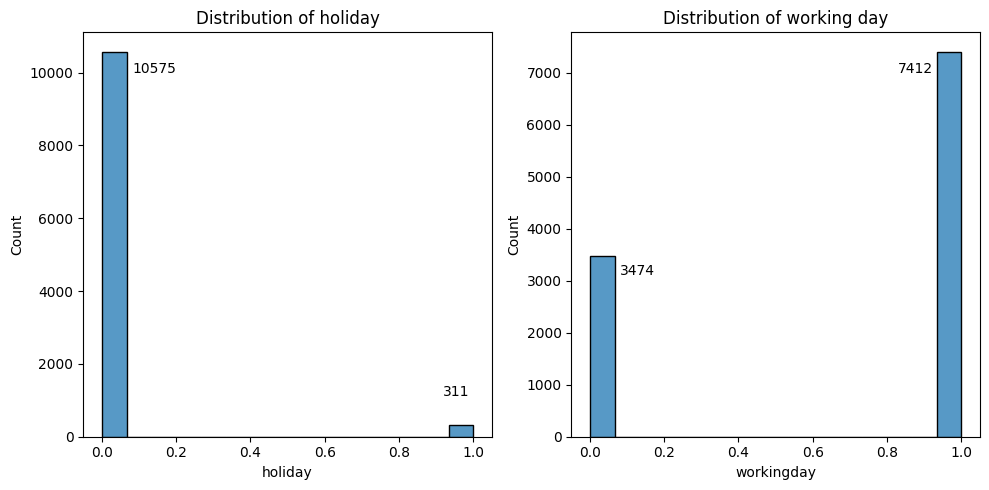

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.histplot(df['holiday'], stat='count')
count_0 = df['holiday'].value_counts()[0]
count_1 = df['holiday'].value_counts()[1]
plt.title('Distribution of holiday')
# Add label to the plot
plt.text(x=0.12, y=0.9, s=f"{count_0}", transform=plt.gca().transAxes)
plt.text(x=0.88, y=0.1, s=f"{count_1}", transform=plt.gca().transAxes)
plt.tight_layout()


plt.subplot(1, 2, 2)
sns.histplot(df['workingday'], stat='count')
count_0 = df['workingday'].value_counts()[0]
count_1 = df['workingday'].value_counts()[1]
plt.title('Distribution of working day')
# Add label to the plot
plt.text(x=0.12, y=0.4, s=f"{count_0}", transform=plt.gca().transAxes)
plt.text(x=0.80, y=0.9, s=f"{count_1}", transform=plt.gca().transAxes)
plt.tight_layout()



- There are 10575 records for non-holidays and 311 records for holidays
- There are 7412 records for working days and 3474 records for non-working days

### Adding a category based on the time

In [ ]:
df['hour_of_booking'] = df['datetime'].dt.hour

In [ ]:
df['hour_of_booking'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

<Axes: xlabel='hour_of_booking', ylabel='count'>

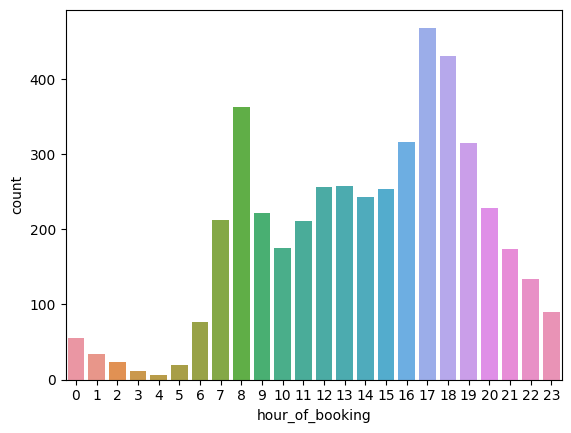

In [ ]:
dft = df.groupby(by=['hour_of_booking'])['count'].mean().reset_index()
sns.barplot(dft, x='hour_of_booking', y='count')

- Most of the bookings are at 17 and 18th hour

In [ ]:
df['hour_category'] = pd.cut(df['hour_of_booking'], bins=[0,4,8,12,16,20,23], labels=['0-4', '5-8', '9-12', '13-16', '17-20', '21-23'])

## Bi-Variate Analysis

<Axes: xlabel='hour_category', ylabel='count'>

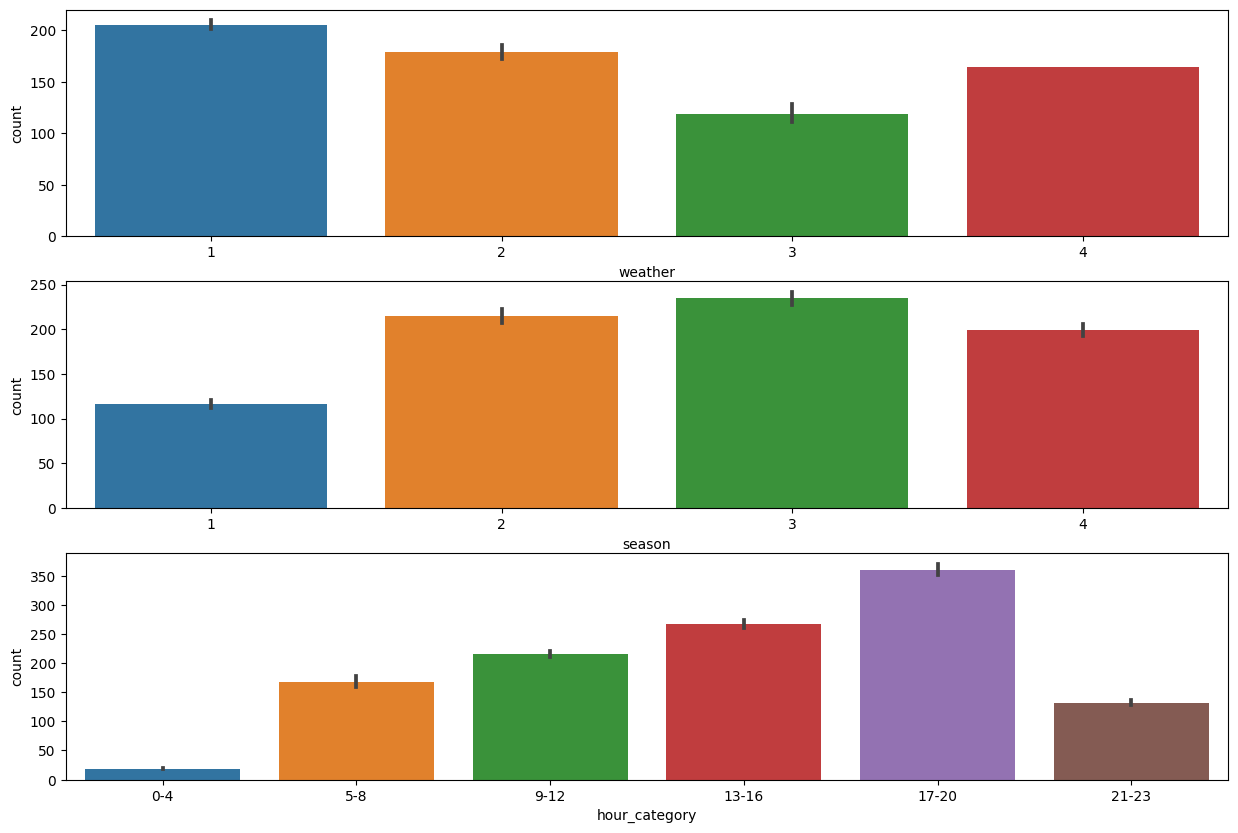

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(3, 1, 1)
sns.barplot(df, x='weather', y='count')

plt.subplot(3, 1, 2)
sns.barplot(df, x='season', y='count')

plt.subplot(3, 1, 3)
sns.barplot(df, x='hour_category', y='count')

```
- Least bookings are in 0-4
- Most bookings are in 17-20, 13-16, 9-12 (peak_hours)
- Most bookings are from season 2 and 3
- Most bookings are in weather 1 and 2
```

### Hypothesis Testing - Holiday vs Registered Users + Casual Users

In [ ]:
df.groupby('holiday')['count'].describe()['mean']

holiday
0    191.741655
1    185.877814
Name: mean, dtype: float64

```
- There is a difference in mean of count between holiday and non-holidays
- Now, is this statistically significant?
- Since, the comparison is between mean between two categories, t-test-2-sample-independent test can be a good candidate
```

### t-test 2 sample indepedent tests

- H0 (Null Hypothesis) : The mean of count on holiday and non-holidays are same
- H1 (Alternate Hypothesis) : The mean of count on holiday and non-holiday are different
- Test Statistic : mean of count
- Test type: Two-Tailed Test

In [ ]:
group_0 = df.groupby('holiday').get_group(0)['count']
group_1 = df.groupby('holiday').get_group(1)['count']
t,p = stats.ttest_ind(group_0, group_1)
if p<0.05:
    print('Difference in the mean is statistically significant. Null Hypothesis can be rejected')
else:
    print('Null hypothesis cannot be rejected')

Null hypothesis cannot be rejected


- The difference in the mean of count between holiday and non-holidays **is not statistically significant**

### Hypothesis Testing - Holiday vs Registered Users

In [ ]:
df.groupby('holiday')['registered'].describe()['mean']

holiday
0    156.094941
1    137.096463
Name: mean, dtype: float64

```
- There is a difference in mean of registered between holiday and non-holidays
- Now, is this statistically significant?
- Since, the comparison is between mean between two categories, t-test-2-sample-independent test can be a good candidate
```

#### t-test 2 sample indepedent tests

- H0 (Null Hypothesis) : The mean of registered on holiday and non-holidays are same
- H1 (Alternate Hypothesis) : The mean of registered on holiday and non-holiday are different
- Test Statistic : mean of registered
- Test type: Two-Tailed Test

In [ ]:
group_0 = df.groupby('holiday').get_group(0)['registered']
group_1 = df.groupby('holiday').get_group(1)['registered']
t1,p1=stats.ttest_ind(group_0, group_1)
t2,p2=stats.ttest_ind(group_0, group_1, alternative='greater')
if p1<0.05 and p2<0.05:
    print('Difference in the mean is statistically significant. Null Hypothesis can be rejected')
else:
    print('Null hypothesis cannot be rejected')


Difference in the mean is statistically significant. Null Hypothesis can be rejected


- Since value of p<0.05, it can be concluded that difference between the means is **statistically significant**. 
- With this, we can conclude that total number of registered users on non-holidays are **greater**.

### Hypothesis Testing : WorkingDay vs Registed Users

In [ ]:
df.groupby('workingday')['registered'].describe()['mean']

workingday
0    129.198330
1    167.904209
Name: mean, dtype: float64

```
- There is a difference in mean of count between workingday and non-workingday
- Now, is this statistically significant?
- Since, the comparison is between mean between two categories, t-test-2-sample-independent test can be a good candidate
```

#### t-test 2 sample indepedent tests

- H0 (Null Hypothesis) : The mean of registered on workingday and non-workingday are same
- H1 (Alternate Hypothesis) : The mean of registered on workingday and non-workingday are different
- Test Statistic : mean of registered
- Test type: Two-Tailed Test

In [ ]:
group_0 = df.groupby('workingday').get_group(0)['registered']
group_1 = df.groupby('workingday').get_group(1)['registered']
t1,p1=stats.ttest_ind(group_0, group_1)
t2,p2=stats.ttest_ind(group_0, group_1, alternative='less')
if p1<0.05 and p2<0.05:
    print('Difference in the mean is statistically significant. Null Hypothesis can be rejected')
else:
    print('Null hypothesis cannot be rejected')


Difference in the mean is statistically significant. Null Hypothesis can be rejected


- Since value of p<0.05, it can be concluded that difference between the means is **statistically significant**. 
- With this, we can conclude that total number of registered users on workingdays are **greater**.

# Season vs Count-Users: ANOVA

In [ ]:
df.groupby('season')['count'].describe()['mean']

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: mean, dtype: float64

- There is a difference in the mean of registered users for difference season.
- Is this difference statistically significant?
- Since there are more than 2 categories, this can be a good candidate for **one-way ANOVA test**

## Assumptions of ANOVA Test

1. The population from which samples are drawn should be normally distributed.
2. Independence of cases: the sample cases should be independent of each other.
3. Homogeneity of variance: Homogeneity means that the variance among the groups should be approximately equal.

### Testing Normality

<Axes: xlabel='count', ylabel='Count'>

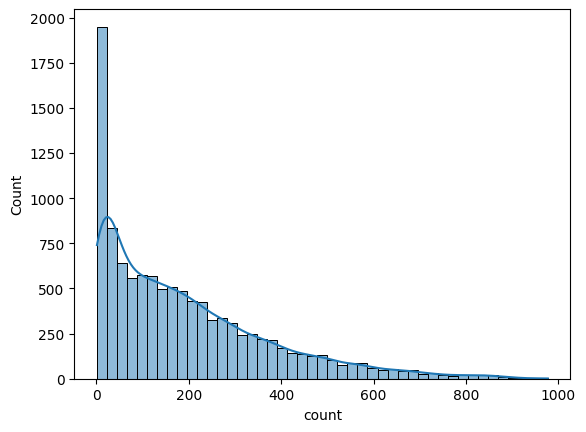

In [ ]:
sns.histplot(df['count'], kde=True)

- The above plot shows that the data is not normal

## Plotting QQ-Plot

In [ ]:
dft = df.loc[df['registered']>0]
dft['bxcx_reg'] = stats.boxcox(dft['registered'])[0]



/var/folders/99/lknm6hjj5hdflvp0wxl6djgh0000gn/T/ipykernel_1226/3221965428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['bxcx_reg'] = stats.boxcox(dft['registered'])[0]


In [ ]:
df[['sqrt_count', 'log_count']] =df['count'].transform((np.sqrt, np.log))

<Axes: xlabel='bxcx_count', ylabel='Count'>

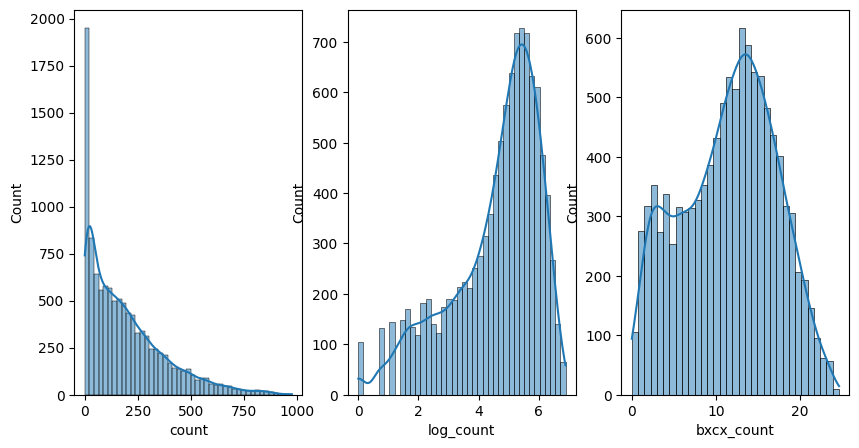

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1, 3, 1)
sns.histplot(df['count'], kde=True)

plt.subplot(1, 3, 2)
sns.histplot(df['log_count'], kde=True)

plt.subplot(1, 3, 3)
sns.histplot(df['bxcx_count'], kde=True)

- `count` is not normally distributed
- Hence applying log-tranformation and box-cox transformation to `count`
- `log_count` and `bxcx_count` are approximately normal compared to `count`

### QQ-Plot - Test for Normality

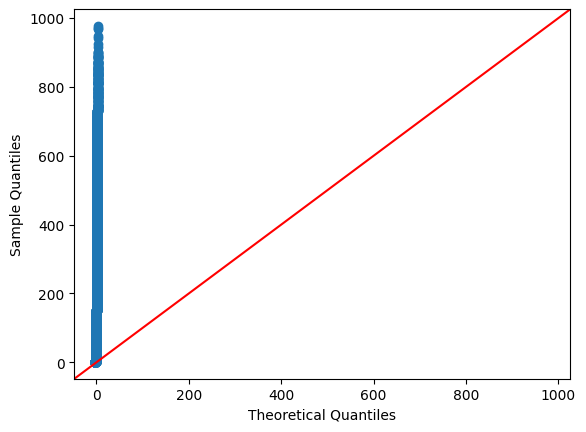

In [ ]:
import numpy as np
import statsmodels.api as sm
import pylab as py

sm.qqplot(df['count'], line ='45')
py.show()

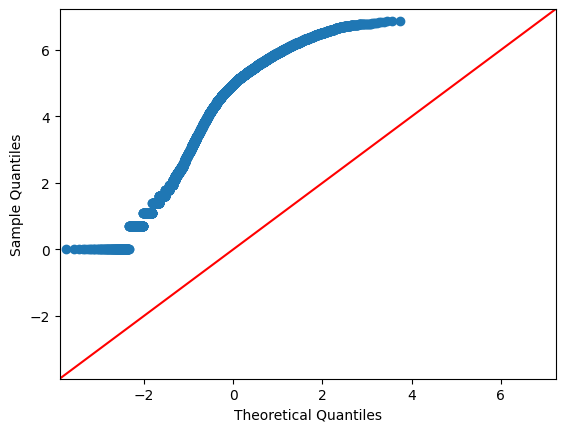

In [ ]:
import numpy as np
import statsmodels.api as sm
import pylab as py


sm.qqplot(df['log_count'], line ='45')
py.show()



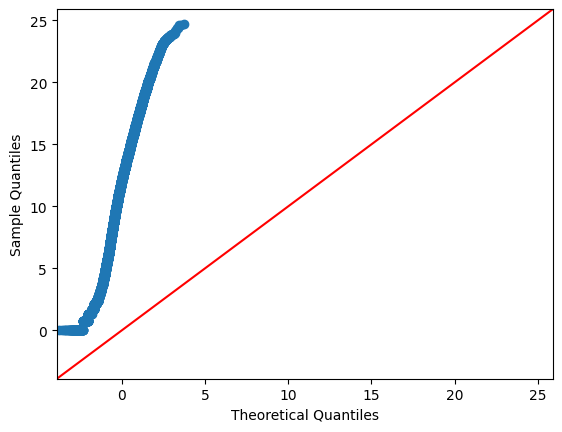

In [ ]:
import numpy as np
import statsmodels.api as sm
import pylab as py


sm.qqplot(df['bxcx_count'], line ='45')
py.show()

- It can be seen that `count` has a large deviation from the expected line
- Comparitively `log_count` is the closest to the ideal line

### Checking Outliers in `count`, `log_count`, `bxcx_count`

Text(0.5, 1.0, 'bxcx_count')

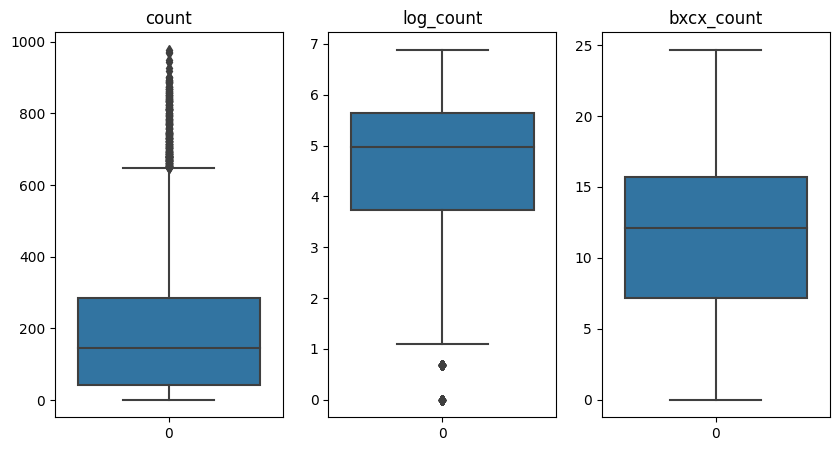

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1, 3, 1)
sns.boxplot(df['count'])
plt.title('count')

plt.subplot(1, 3, 2)
sns.boxplot(df['log_count'])
plt.title('log_count')


plt.subplot(1, 3, 3)
sns.boxplot(df['bxcx_count'])
plt.title('bxcx_count')


- Plenty of outliers in `count`
- Outliers has reduced significantly in `log_count` and `bxcx_count`

### Shapiro Test for `count`, `log_count` and `bxcx_count`

In [ ]:
features = ['count', 'log_count', 'bxcx_count']
for feature in features:
    print(stats.shapiro(df[feature]))

ShapiroResult(statistic=0.878369927406311, pvalue=0.0)
ShapiroResult(statistic=0.9154107570648193, pvalue=0.0)
ShapiroResult(statistic=0.9789803624153137, pvalue=4.093234516935089e-37)


- Null Hypothesis is that the distribution is normally distributed
- Alternate hypothesis is that the distribution is not normally distributed
- Since p-value is very low, all the features fail the normality test with `shapiro`

### Testing equal-variance between different seasons

In [ ]:
df.groupby(by=['season'])[['bxcx_count','log_count']].describe()

bxcx_count                                                            \
            count       mean       std  min       25%        50%        75%   
season                                                                        
1          2686.0   9.171470  4.981440  0.0  5.471028   9.364828  12.678392   
2          2733.0  12.143640  5.716588  0.0  7.654223  12.918437  16.420376   
3          2733.0  12.762041  5.599344  0.0  8.833619  13.568540  16.907933   
4          2734.0  11.831856  5.477833  0.0  7.791756  12.586310  15.884557   

                  log_count                                               \
              max     count      mean       std  min       25%       50%   
season                                                                     
1       22.975216    2686.0  3.984206  1.539737  0.0  3.178054  4.356709   
2       23.695293    2733.0  4.703267  1.462172  0.0  3.891820  5.147494   
3       24.666872    2733.0  4.860311  1.378662  0.0  4.219508  5.273000   
4       24.403368    2734.0  4.652650  1.421134  0.0  3.931826  5.081404   

                            
             75%       max  
season                      
1       5.099866  6.685861  
2       5.771441  6.771936  
3       5.849325  6.884487  
4       5.683580  6.854355

In [ ]:
stats.levene(*[df.groupby(by=['season']).get_group(i)['log_count'] for i in range(1,5) ])

LeveneResult(statistic=9.640605587638781, pvalue=2.3678125658230693e-06)

In [ ]:
stats.levene(*[df.groupby(by=['season']).get_group(i)['bxcx_count'] for i in range(1,5) ])

LeveneResult(statistic=21.91023925742378, pvalue=3.852109132516859e-14)

- Null Hypothesis is that all the groups have equal variance
- Alternate Hypothesis is that the groups have un-equal variances
- Since p-value is very low, it can be concluded that both `log_count` and `bxcx_count` fail the levene test
- Comparitively, std of `log_count` is closer compared to `bxcx_count`
- Considering everything, **`log_count`** will be used for analysis

#### Performing the ONOVA Test despite not passing normality and equal variance tests

In [ ]:
stats.f_oneway(*[df.groupby(by=['season']).get_group(i)['log_count'] for i in range(1,5)])

F_onewayResult(statistic=192.44768979509686, pvalue=1.3071364586238867e-121)

 - Null hypothesis is that mean of `log_count` for different season is same
 - Alternate hypothesis is that mean of `log_count` for different season is different
 - test statistic is `mean` of `log_count`
 - Since p-value is very low, difference of means is **very significant**.
 
 - Hence, by **anova** test, number of rides is **dependent** on **season**.

In [ ]:
df['weather'].unique()

array([1, 2, 3, 4])

## Check dependency of weather on count-users: ANOVA


In [ ]:
stats.f_oneway(*[df.groupby(by=['weather']).get_group(i)['log_count'] for i in range(1,5)])

F_onewayResult(statistic=49.879471483981746, pvalue=5.214500121600914e-32)

 - Null hypothesis is that mean of `log_count` for different `weather` is same
 - Alternate hypothesis is that mean of `log_count` for different `weather` is different
 - test statistic is `mean` of `log_count`
 - Since p-value is very low, difference of means is **very significant**.
 - Hence, by **anova** test, number of rides is **dependent** on **season**.

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'date', 'hour_of_booking', 'hour_category', 'bxcx_count', 'sqrt_count',
       'log_count'],
      dtype='object')

## Relation between weather and season: chi-square

- Since both are categorical values, we can perform. chi-square test

In [ ]:
stats.chi2_contingency(pd.crosstab(df['weather'], df['season']))

Chi2ContingencyResult(statistic=49.15865559689363, pvalue=1.5499250736864862e-07, dof=9, expected_freq=array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
       [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
       [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
       [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))

- Null Hypothesis is that weather and season are not depedent on each other
- Alternate hypothesis is that weather and season are dependent on each other
- Since p-value is very low, it can be concluded that **season is dependent on weather**.

### Checking relation between hour_of_day and cycles-rented : ANOVA

In [ ]:
df.groupby(by=['hour_category'])['log_count'].describe()

,count,mean,std,min,25%,50%,75%,max
hour_category,,,,,,,,
0-4,1777.0,2.272125,1.154811,0.000000,1.609438,2.197225,2.995732,5.123964
5-8,1817.0,4.263185,1.507678,0.000000,3.178054,4.454347,5.560682,6.732211
9-12,1821.0,5.198359,0.644128,1.098612,4.852030,5.288267,5.641907,6.629363
13-16,1824.0,5.408990,0.657498,1.945910,5.043425,5.499213,5.878435,6.663133
17-20,1824.0,5.685367,0.701747,2.397895,5.283204,5.796058,6.206576,6.884487
21-23,1368.0,4.669987,0.718096,1.386294,4.234107,4.795791,5.194342,6.369901


In [ ]:
categories = ['0-4', '5-8', '9-12', '13-16', '17-20', '21-23']

In [ ]:
stats.f_oneway(*[df.groupby(by=['hour_category']).get_group(category)['log_count'] for category in categories])

F_onewayResult(statistic=2991.7780080873013, pvalue=0.0)

- Null hypothesis is that `hour_cateogory` has no significance on `count`
- Alternate hypothesis is that `count` is depedent on `hour_category`
- Since p-value is low, it can be conluded that `hour_category` is a **dependent variable on `count`**.

## Dependency of `atemp`, `temp` vs `count`

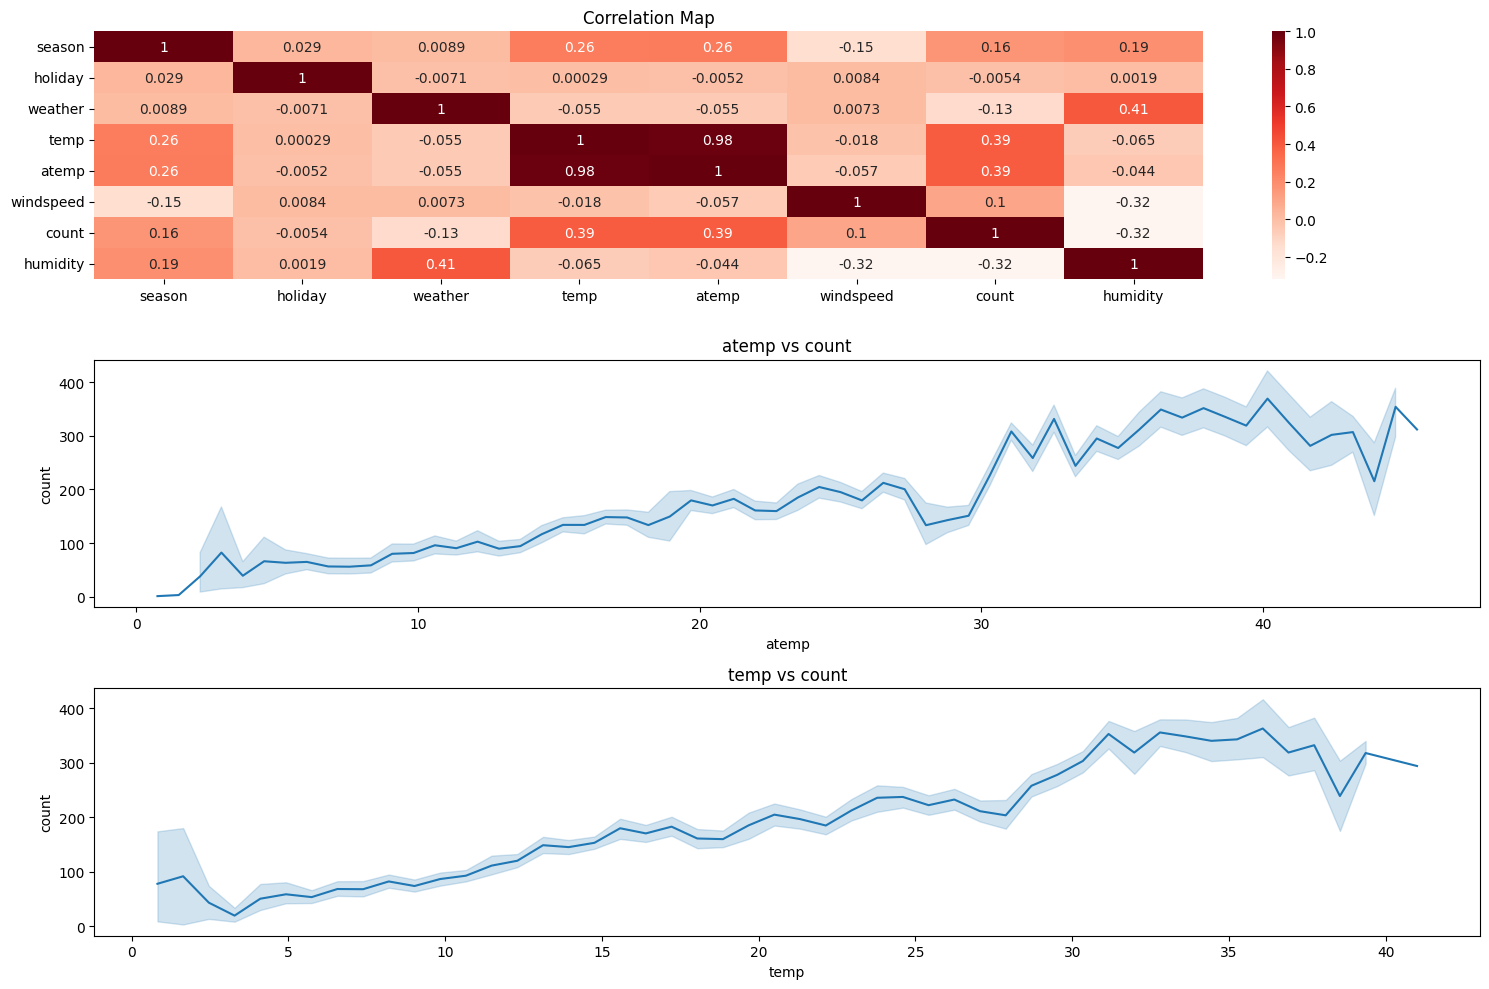

In [ ]:
cols = ['season', 'holiday', 'weather', 'temp', 'atemp', 'windspeed', 'count', 'humidity']
plt.figure(figsize=(15,10))

plt.subplot(3, 1, 1)
sns.heatmap(df[cols].corr(),cmap='Reds', annot=True)
plt.title('Correlation Map')

plt.subplot(3, 1, 2)
sns.lineplot(df, x='atemp', y='count')
plt.title('atemp vs count')

plt.subplot(3, 1, 3)
sns.lineplot(df, x='temp', y='count')
plt.title('temp vs count')
plt.tight_layout()


- `temp` and `atemp` are directly proportional to `count`
- `windspeed` is inversely proportional to `temp` and `atemp`
- `humidity` is inversely proportional to `count`

## Conclusion

- `temp`, `atemp`, `weather`, `season` are directly depedent on `count`
- Most bookings are from season 2 (summer) and 3 (fall)
- Most bookings are in weather 1 `(Clear, Few clouds, partly cloudy, partly cloudy)`  and 2 `(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)`
- More bookings are on `workingday` compared to `non-workingday`
- More bookings are on `non-holiday` compared to `holiday`

## Recommendation

- The maintenance of bikes can be done on the very early hours where the demand is very less. Thus, maintaining the quality of service to the customers.
- The demand for vehicles is very less in `spring`. The operations could be managed to have low cost on the company during that period.
- Should plan for more vehicles during `summer` and `fall` where the demand is high